#### Dataset Line

<div>

   <a href="https://www.kaggle.com/datasets/tongpython/cat-and-dog?select=training_set" style="
        display: inline-block;
        padding: 10px 20px;
        font-size: 16px;
        color: white;
        background-color: blue;
        text-decoration: none;
        border-radius: 5px;
        border: none;
        cursor: pointer;
    ">Click Me
    </a>
</div>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ruddro","key":"fb61acd5697e404629bb3e272131377a"}'}

In [3]:
!mkdir -p ~/.kaggle  # Ensure the directory exists
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set correct permissions

In [4]:
!kaggle datasets list

ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                              63KB  2025-03-07 05:44:03           6281         94  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                               20KB  2025-02-18 06:50:24          12951        230  1.0              
atharvasoundankar/global-energy-consumption-2000-2024                  Global Energy Consumption (2000-2024) 🔥⚡            252KB  2025-03-14 05:06:39           1146         28  1.0              
aniruddhawankhede/mental-

In [6]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 210M/218M [00:01<00:00, 148MB/s]
100% 218M/218M [00:01<00:00, 175MB/s]


In [ ]:
!unzip cat-and-dog.zip -d dataset/

## Cat Dog Classification using CNN

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten,Conv2D,MaxPooling2D,MaxPool2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

#### generator
A generator in Python is a function that returns an iterator that produces a sequence of values when iterated over. Generators are written using the `yield` keyword. They are more memory efficient than lists because they generate items one at a time and only when required.

In [11]:
train_data = keras.utils.image_dataset_from_directory(
    directory=r'/content/dataset/training_set/training_set/',
    labels="inferred",
    label_mode="int", # categorical, binary
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

test_data = keras.utils.image_dataset_from_directory(
    directory=r"/content/dataset/test_set/test_set",
    labels="inferred",
    label_mode="int", # categorical, binary
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [12]:
## Normalization
def process_normalization(image, label):
    return image / 255.0, label
    return image, label

In [13]:
train_ds = train_data.map(process_normalization)
test_ds = test_data.map(process_normalization)

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(256, 256, 3),padding="valid", activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="valid", activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="valid", activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.5242 - loss: 0.7528 - val_accuracy: 0.5161 - val_loss: 0.6828
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.6086 - loss: 0.6587 - val_accuracy: 0.6446 - val_loss: 0.6345
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.7059 - loss: 0.5717 - val_accuracy: 0.7054 - val_loss: 0.6143
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.7957 - loss: 0.4422 - val_accuracy: 0.6915 - val_loss: 0.7251
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.8791 - loss: 0.2835 - val_accuracy: 0.6644 - val_loss: 1.3176
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.9421 - loss: 0.1523 - val_accuracy: 0.6906 - val_loss: 1.2622
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9746 - loss: 0.0724 - val_accuracy: 0.7004 - val_loss: 1.7864
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.9799 - loss: 0.0581 - 

In [18]:
print("Train accuracy: ", history.history['accuracy'][-1]*100,"%")
print("Test accuracy: ", history.history['val_accuracy'][-1]*100,"%")

Train accuracy:  98.46345782279968 %
Test accuracy:  67.96836256980896 %


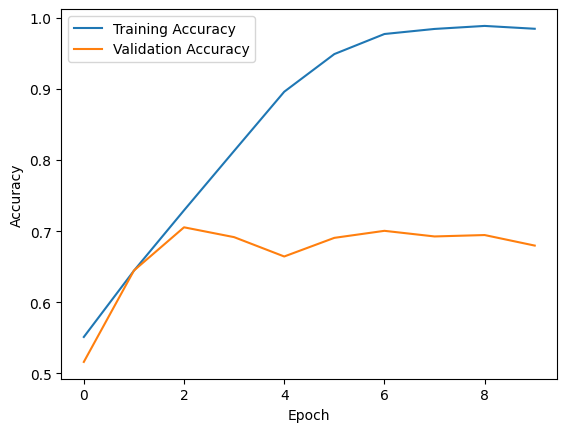

In [19]:
#create a plot of the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

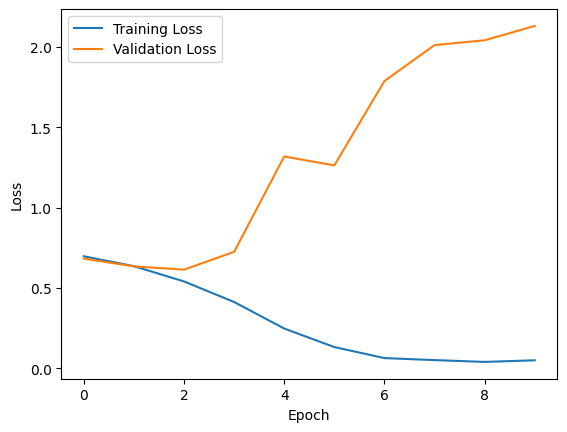

In [20]:
#create loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step


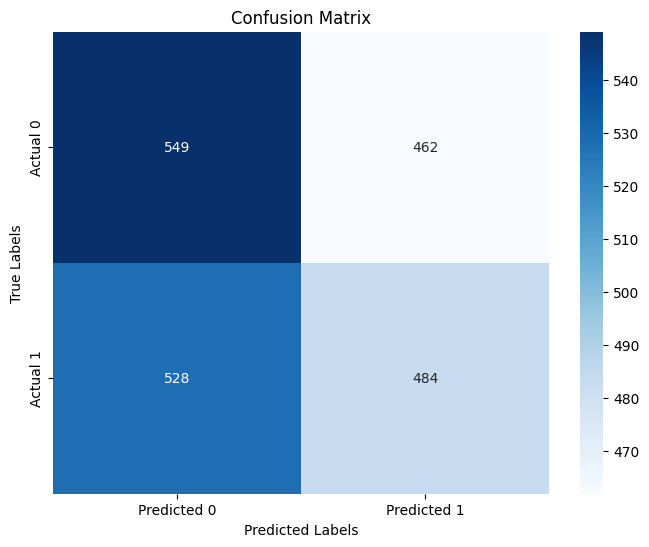

In [21]:
# prompt: create confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'test_ds' is your test dataset and 'model' is your trained model
y_pred = model.predict(test_ds)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

# Extract true labels from test_ds
y_true = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Add Batch Normalization and Dropout Layer

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(256, 256, 3),padding="valid", activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="valid", activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="valid", activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Data Augmentation

In [26]:
my_dir= r'/content/dataset/training_set/training_set/'

In [27]:
categories = ['cats', 'dogs']

In [35]:
import cv2
import os
import numpy as np

data = []

for category in categories:
    path = os.path.join(my_dir, category)
    if category == 'cats':
        label = 0
    else:
        label = 1
    for img in os.listdir(path):
        # Check if the file is a valid image file
        if img.startswith('.') or img == '_DS_Store':  # Ignore hidden files and .DS_Store
            continue

        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)

        # Check if the image was loaded successfully
        if img_arr is not None:
            img_arr = cv2.resize(img_arr, (150, 150))
            data.append([img_arr, label])
        else:
            print(f"Warning: Could not load image at path: {img_path}")

In [37]:
import random
random.shuffle(data)

In [38]:
x = []
y = []

for img,labels in data:
    x.append(img)
    y.append(labels)

In [39]:
x = np.array(x)
y = np.array(y)

In [42]:
x.shape
x = x/255

In [44]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
models = Sequential()

models.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
models.add(MaxPooling2D((2, 2)))
models.add(Conv2D(32, (3, 3), activation='relu'))
models.add(MaxPooling2D((2, 2)))
models.add(Conv2D(64, (3, 3), activation='relu'))
models.add(MaxPooling2D((2, 2)))


models.add(Flatten())

models.add(Dense(64, activation='relu'))
models.add(Dropout(0.5))
models.add(Dense(1, activation='sigmoid'))

models.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
history1 = models.fit(x, y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.5212 - loss: 0.7398 - val_accuracy: 0.6190 - val_loss: 0.6630
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6191 - loss: 0.6518 - val_accuracy: 0.6602 - val_loss: 0.6010
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6856 - loss: 0.5931 - val_accuracy: 0.7196 - val_loss: 0.5527
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7201 - loss: 0.5513 - val_accuracy: 0.7533 - val_loss: 0.5144
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7511 - loss: 0.5147 - val_accuracy: 0.7333 - val_loss: 0.5263
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7673 - loss: 0.4874 - val_accuracy: 0.7595 - val_loss: 0.4859
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7851 - loss: 0.4528 - val_accuracy: 0.7614 - val_loss: 0.5101
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8053 - loss: 0.4198 - val_acc

In [50]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=r'/content/dataset/training_set/training_set/',
    target_size=(150, 150),
    batch_size = 32,
    class_mode='binary',
)

validation_generator = test_datagen.flow_from_directory(
    directory=r"/content/dataset/test_set/test_set",
    target_size=(150, 150),
    batch_size = 32,
    class_mode='binary',
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [52]:
models1 = Sequential()

models1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
models1.add(MaxPooling2D((2, 2)))
models1.add(Conv2D(32, (3, 3), activation='relu'))
models1.add(MaxPooling2D((2, 2)))
models1.add(Conv2D(64, (3, 3), activation='relu'))
models1.add(MaxPooling2D((2, 2)))


models1.add(Flatten())

models1.add(Dense(64, activation='relu'))
models1.add(Dropout(0.5))
models1.add(Dense(1, activation='sigmoid'))

models1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
history2 = models1.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 205ms/step - accuracy: 0.8002 - loss: 0.4406 - val_accuracy: 0.8072 - val_loss: 0.4232
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 207ms/step - accuracy: 0.8160 - loss: 0.4199 - val_accuracy: 0.8018 - val_loss: 0.4244
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - accuracy: 0.8140 - loss: 0.4123 - val_accuracy: 0.8107 - val_loss: 0.4286
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 208ms/step - accuracy: 0.8165 - loss: 0.4266 - val_accuracy: 0.8369 - val_loss: 0.3919
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 81s 205ms/step - accuracy: 0.8244 - loss: 0.4032 - val_accuracy: 0.8097 - val_loss: 0.4370
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 84s 213ms/step - accuracy: 0.8263 - loss: 0.4028 - val_accuracy: 0.8384 - val_loss: 0.3765
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - accuracy: 0.8216 - loss: 0.3895 - val_accuracy: 0.7311 - val_loss: 0.4960
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 205ms/step - accuracy: 0.8295 - loss: 0

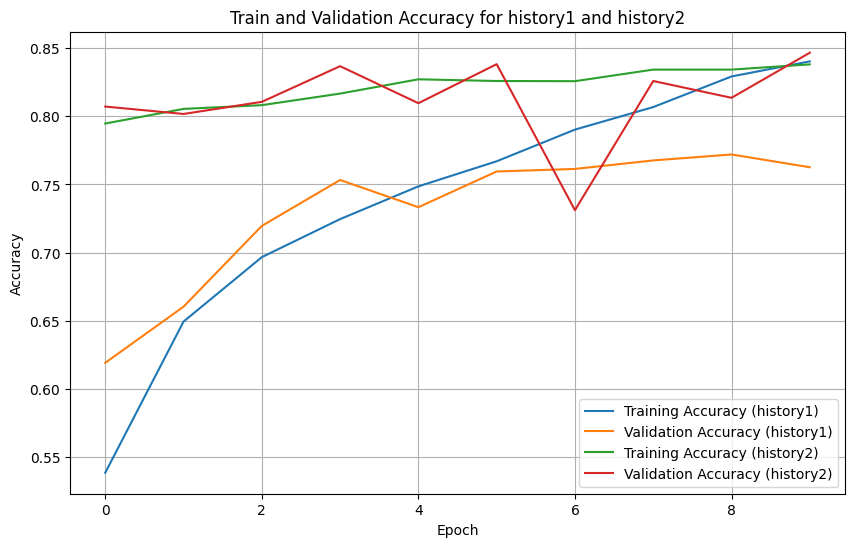

In [57]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy (history1)')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy (history1)')
plt.plot(history2.history['accuracy'], label='Training Accuracy (history2)')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy (history2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy for history1 and history2')
plt.legend()
plt.grid(True)
plt.show()


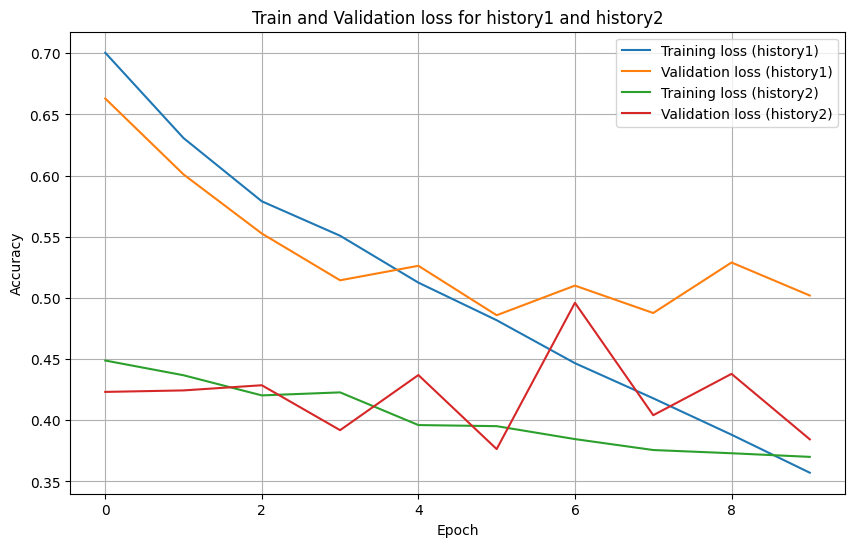

In [59]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='Training loss (history1)')
plt.plot(history1.history['val_loss'], label='Validation loss (history1)')
plt.plot(history2.history['loss'], label='Training loss (history2)')
plt.plot(history2.history['val_loss'], label='Validation loss (history2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation loss for history1 and history2')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
history1.history

{'accuracy': [0.538257360458374,
  0.6492816805839539,
  0.6965959072113037,
  0.7245471477508545,
  0.7485946416854858,
  0.767020583152771,
  0.7902873158454895,
  0.8068394660949707,
  0.8293254375457764,
  0.8404122591018677],
 'loss': [0.7004570364952087,
  0.6306830644607544,
  0.5789971947669983,
  0.5508550405502319,
  0.5125284194946289,
  0.48180049657821655,
  0.44667941331863403,
  0.4179723858833313,
  0.3882237374782562,
  0.3571411371231079],
 'val_accuracy': [0.6189881563186646,
  0.6602123379707336,
  0.7195502519607544,
  0.7532792091369629,
  0.7332916855812073,
  0.7595252990722656,
  0.7613991498947144,
  0.7676452398300171,
  0.7720174789428711,
  0.762648344039917],
 'val_loss': [0.663030207157135,
  0.6009753942489624,
  0.5526710748672485,
  0.5144253969192505,
  0.5262876152992249,
  0.48587697744369507,
  0.5100919604301453,
  0.4876896142959595,
  0.5289854407310486,
  0.501997172832489]}